In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# Working with Sentences
In order to make sense of the structure of text, it is important to often look at larger parts of the corpus. 
This can be done at various levels, easiest at a sentence level. 

In [5]:
# Loading a sample text
from urllib import request
import nltk

# Loading the text from the datasource
url = "https://www.gutenberg.org/files/55463/55463-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [6]:
# Converting the raw text to word tokenized text
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

# Convert raw text to sentence tokenized text
sentence_tokens = nltk.sent_tokenize(raw)
text_sentence = nltk.Text(sentence_tokens)

### Comparing both versions of Tokenization

In [17]:
# Sentence based tokenization
print('\n::: The result has a type of {}, with a length of {}\n'.format(type(text_sentence), len(text_sentence)))
text_sentence[101]


::: The result has a type of <class 'nltk.text.Text'>, with a length of 2373



'You can make it if you try.”\r\n\r\n“You’re the most persistenest person I ever seen!” grumbled James\r\nMontague Fortune.'

In [18]:
# Word based tokenization 
print('\n:: The result has a type of {}, and a length of {}\n'.format(type(text), len(text)))
text[101]


:: The result has a type of <class 'nltk.text.Text'>, and a length of 49986



'ebook'

### Distribution based Indicators

#### Investigating Sentence Length

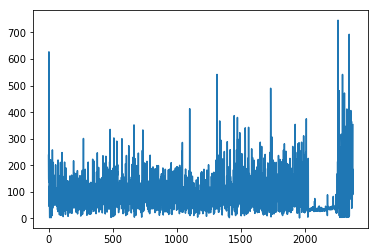

In [27]:
import numpy as np

sent_length = [len(s) for s in text_sentence]
# Investigating the lenght distribution of the Text
plt.plot(sent_length)

#### Describing Distribution measures of Sentence Length

In [30]:
# Describing distribution 
print('The Sentences have:\nMean:::{}\nSTD:::{}\nMin:::{}\nMAX:::{}'.format(np.mean(sent_length), np.std(sent_length), np.min(sent_length), np.max(sent_length)))

The Sentences have:
Mean:::93.77496839443742
STD:::71.18425677500342
Min:::2
MAX:::746


### Investigating Distribution of word length

In [66]:
# Counting the number of long word
def long_words(words, cutoff=5):
     return [w for w in text if len(w) > cutoff]

In [164]:
# Creating a frequency count for all words in text
freq_dict = nltk.FreqDist(long_words(tokens))

# Subsetting the max 100 Frequent words
freq_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
freq_words = [k for k,v in freq_dict][:100]

# Subsettint the max 100 infrequent words
infreq_words = [k for k,v in freq_dict[-1000:]]

### Investigating Distribution of common words

Here i am counting up the number of occurences of the most common words with a length > 5

In [167]:
# Create the count how many most frequent words we find per sentence
def count_freq(sentence):
    cnt = 0
    for word in sentence:
        if word in freq_words:
            cnt += 1
    return cnt

# Apply count to all sentences
sentence_freq = list(map(count_freq, map(nltk.word_tokenize, text_sentence)))

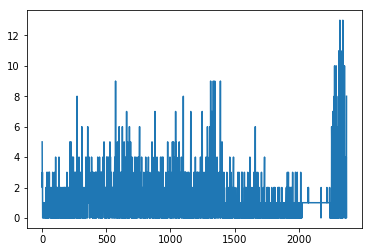

In [168]:
# Displaying the distribution of most frequent used words troughout the text
plt.plot(sentence_freq)

### Investigating the Distribution of uncommon words

Let's turn it around and investigate the occurences of uncommon words troughout the text

In [169]:
# Create the count of the least common words
def count_infreq(sentence):
    cnt = 0
    for w in sentence:
        if w in infreq_words:
            cnt += 1
    return cnt

sentence_infreq = list(map(count_infreq, map(nltk.word_tokenize, text_sentence)))

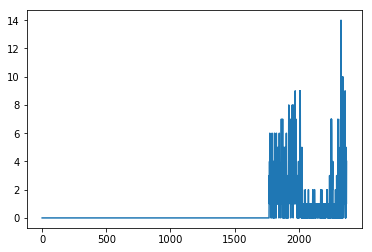

In [170]:
plt.plot(sentence_infreq)

### Calculating the word count of frequency words based on overall sentence length

It seems the length of the sentences strongly correlates with the number of frequent and unfrequently used words in the corpus. 

By standardizing the count on the overall sentence length, we might be able to clean up this part a bit.

In [171]:
def count_infreq_clean(sentence):
    length = len(sentence)
    cnt = 0
    for w in sentence:
        if w in infreq_words:
            cnt += 1
    return cnt / length

sentence_infreq_clean = list(map(count_infreq_clean, map(nltk.word_tokenize, text_sentence)))


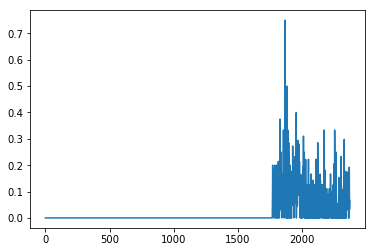

In [172]:
plt.plot(sentence_infreq_clean)

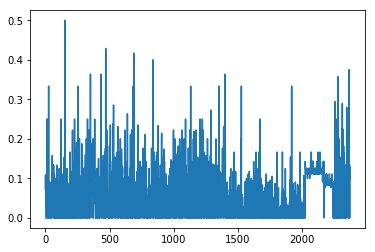

In [173]:
def count_freq_clean(sentence):
    length = len(sentence)
    cnt = 0
    for w in sentence:
        if w in freq_words:
            cnt += 1
    return cnt / length

plt.plot(list(map(count_freq_clean, map(nltk.word_tokenize, text_sentence))))

### Creating subsets of Words 

we can work with the differences between specific sequences of the text by subsetting them. 

#### Creating a subset based on frequency

In [218]:
# Creating a freq Count
fdist = nltk.FreqDist(text)

# Sorting the frequency count - retaining word order based on count
fdist_sorted = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

fdist_sorted[:10]

[(',', 2821),
 ('.', 2244),
 ('the', 2162),
 ('’', 1440),
 ('and', 1124),
 ('to', 1017),
 ('a', 983),
 ('“', 943),
 ('of', 925),
 ('”', 919)]

In [182]:
# Creating a difference set
def diff(ind_1, ind_2):
    return [w for w in set(word_sentences[ind_1]).difference(word_sentences[ind_2])]


#### Analyzing the uniqueness of word choice

In [192]:
# Calculate the number of individual words for each sentence
[len(set(s)) for s in word_sentences][:10]

[39, 24, 23, 86, 10, 15, 21, 12, 8, 2]

In [193]:
# Calculate the number of overall words for each sentence
[len(s) for s in word_sentences][:10]

[46, 28, 29, 113, 10, 19, 23, 13, 9, 2]

In [197]:
# Calculate the number of repetitive words by sentence
set_len = [len(set(s)) for s in word_sentences]
sent_len = [len(s) for s in word_sentences]

# Create the length weighted amount of repetitive words
uniqueness = [s_len / sen_len for s_len, sen_len in zip(set_len, sent_len)]

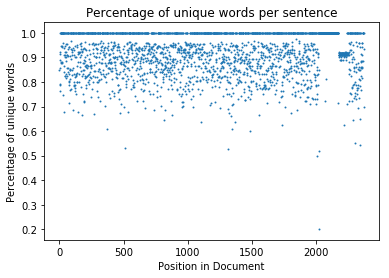

In [209]:
plt.scatter(range(len(uniqueness)), uniqueness, s=0.9)
plt.title('Percentage of unique words per sentence')
plt.xlabel('Position in Document')
plt.ylabel('Percentage of unique words')